In [2]:
!pip install nltk
!pip install gensim
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached gensim-4.3.2.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for smart-open>=1.8.1 from https://files.pythonhosted.org/packages/65/12/cc24847b4b0b124501a33cd8f7963f79f6f6584bc7f2f4fc16bbbaa54c8f/smart_open-7.0.4-py3-none-any.whl.metadata
  Using cached smart_open-7.0.4-py3-none-any.whl.metadata (23 kB)
Using cached smart_open-7.0.4-py3-none-any.whl (61 kB)
Failed to build gensim


  error: subprocess-exited-with-error
  
  × Building wheel for gensim (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [714 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      creating build\lib.win-amd64-cpython-312\gensim
      copying gensim\downloader.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\interfaces.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\matutils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\nosy.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\utils.py -> build\lib.win-amd64-cpython-312\gensim
      copying gensim\__init__.py -> build\lib.win-amd64-cpython-312\gensim
      creating build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\bleicorpus.py -> build\lib.win-amd64-cpython-312\gensim\corpora
      copying gensim\corpora\csvcorpus.py -> bui


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'gensim'

In [4]:
df = pd.read_csv('Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
df.drop(columns = ['ID', 'Resume_html'], inplace = True)
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [6]:
STEMMER = nltk.stem.porter.PorterStemmer()

In [7]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    # stemming
    txt = [STEMMER.stem(w) for w in txt]

    return ' '.join(txt)

In [8]:
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))
# drop original text column
df.pop('Resume_str')
df

NameError: name 're' is not defined

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [10]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

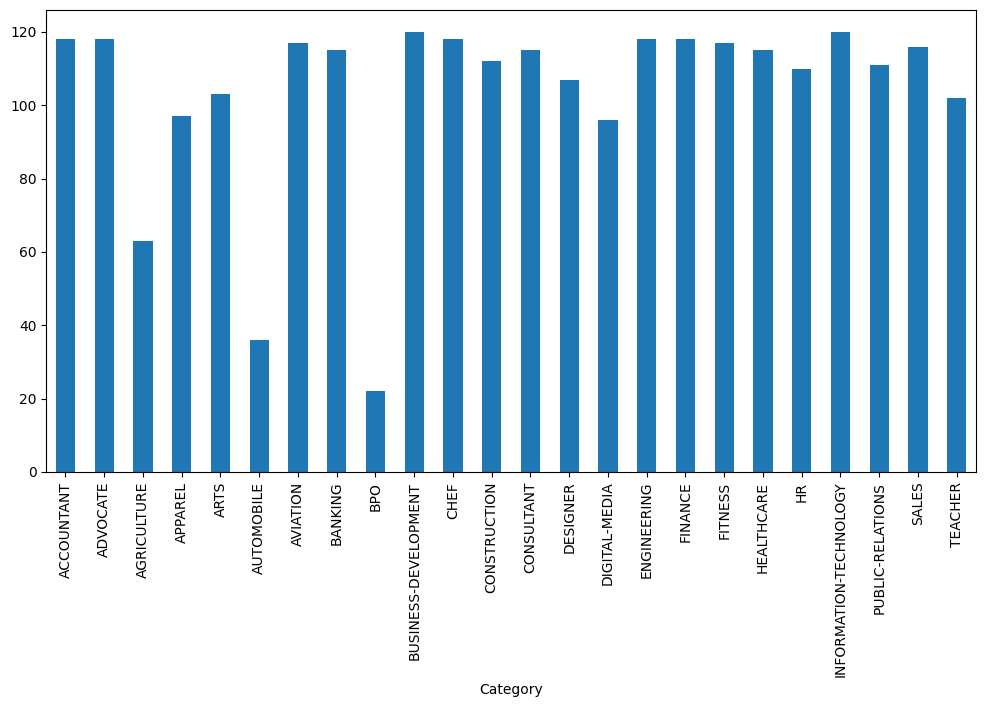

In [11]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

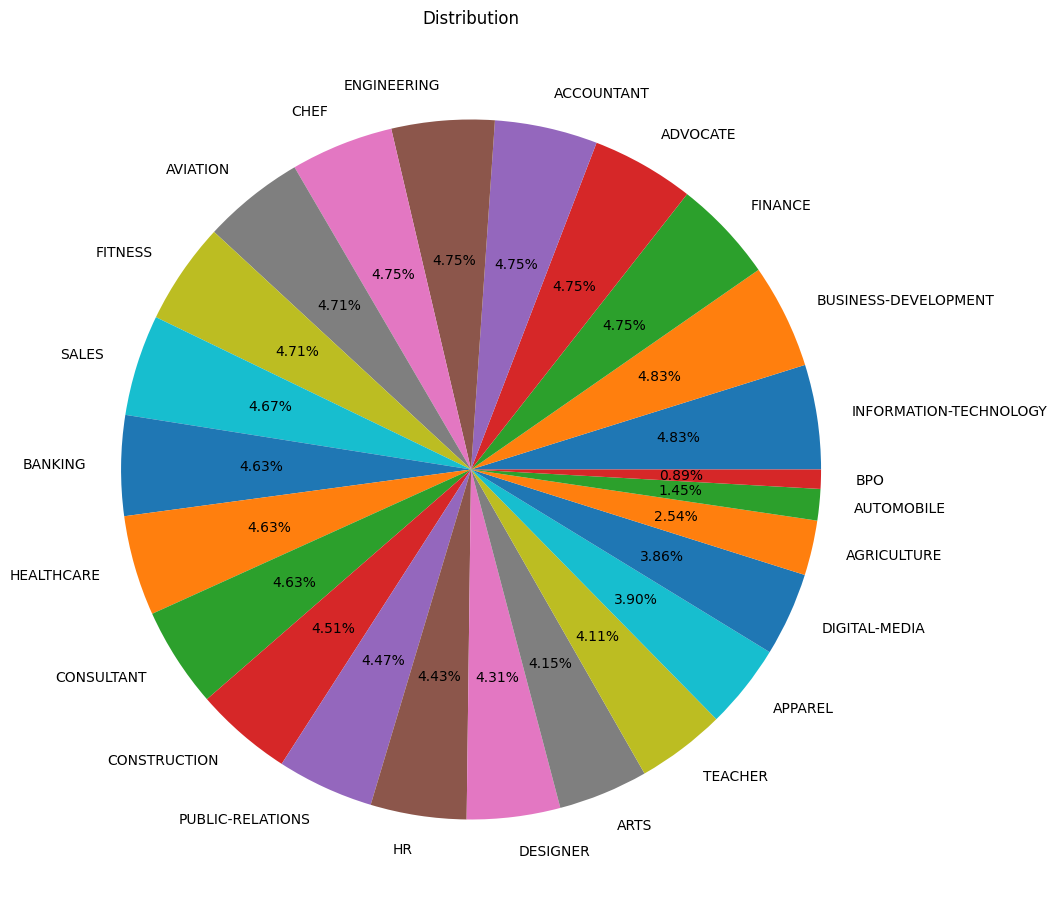

In [12]:
from matplotlib.gridspec import GridSpec
count=df['Category'].value_counts()
label=df['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

In [14]:
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [15]:
df_categories = [df[df['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]
df_categories[10]

,Resume,Category
1357,chef career focu nurs student recent obtain cn...,CHEF
1358,chef summari custom orient fast food worker de...,CHEF
1359,chef career overview dedic custom servic repre...,CHEF
1360,chef summari experienc cater chef skill prepar...,CHEF
1361,rm roxann mejia summari motiv chef compet keep...,CHEF
...,...,...
1470,owner chef summari chef year critic acclaim wo...,CHEF
1471,kindergarten teacher profession summari energe...,CHEF
1472,substitut para profession summari profession m...,CHEF
1473,execut chef partner summari proven abil fine d...,CHEF


In [16]:
# word frequency for each category
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

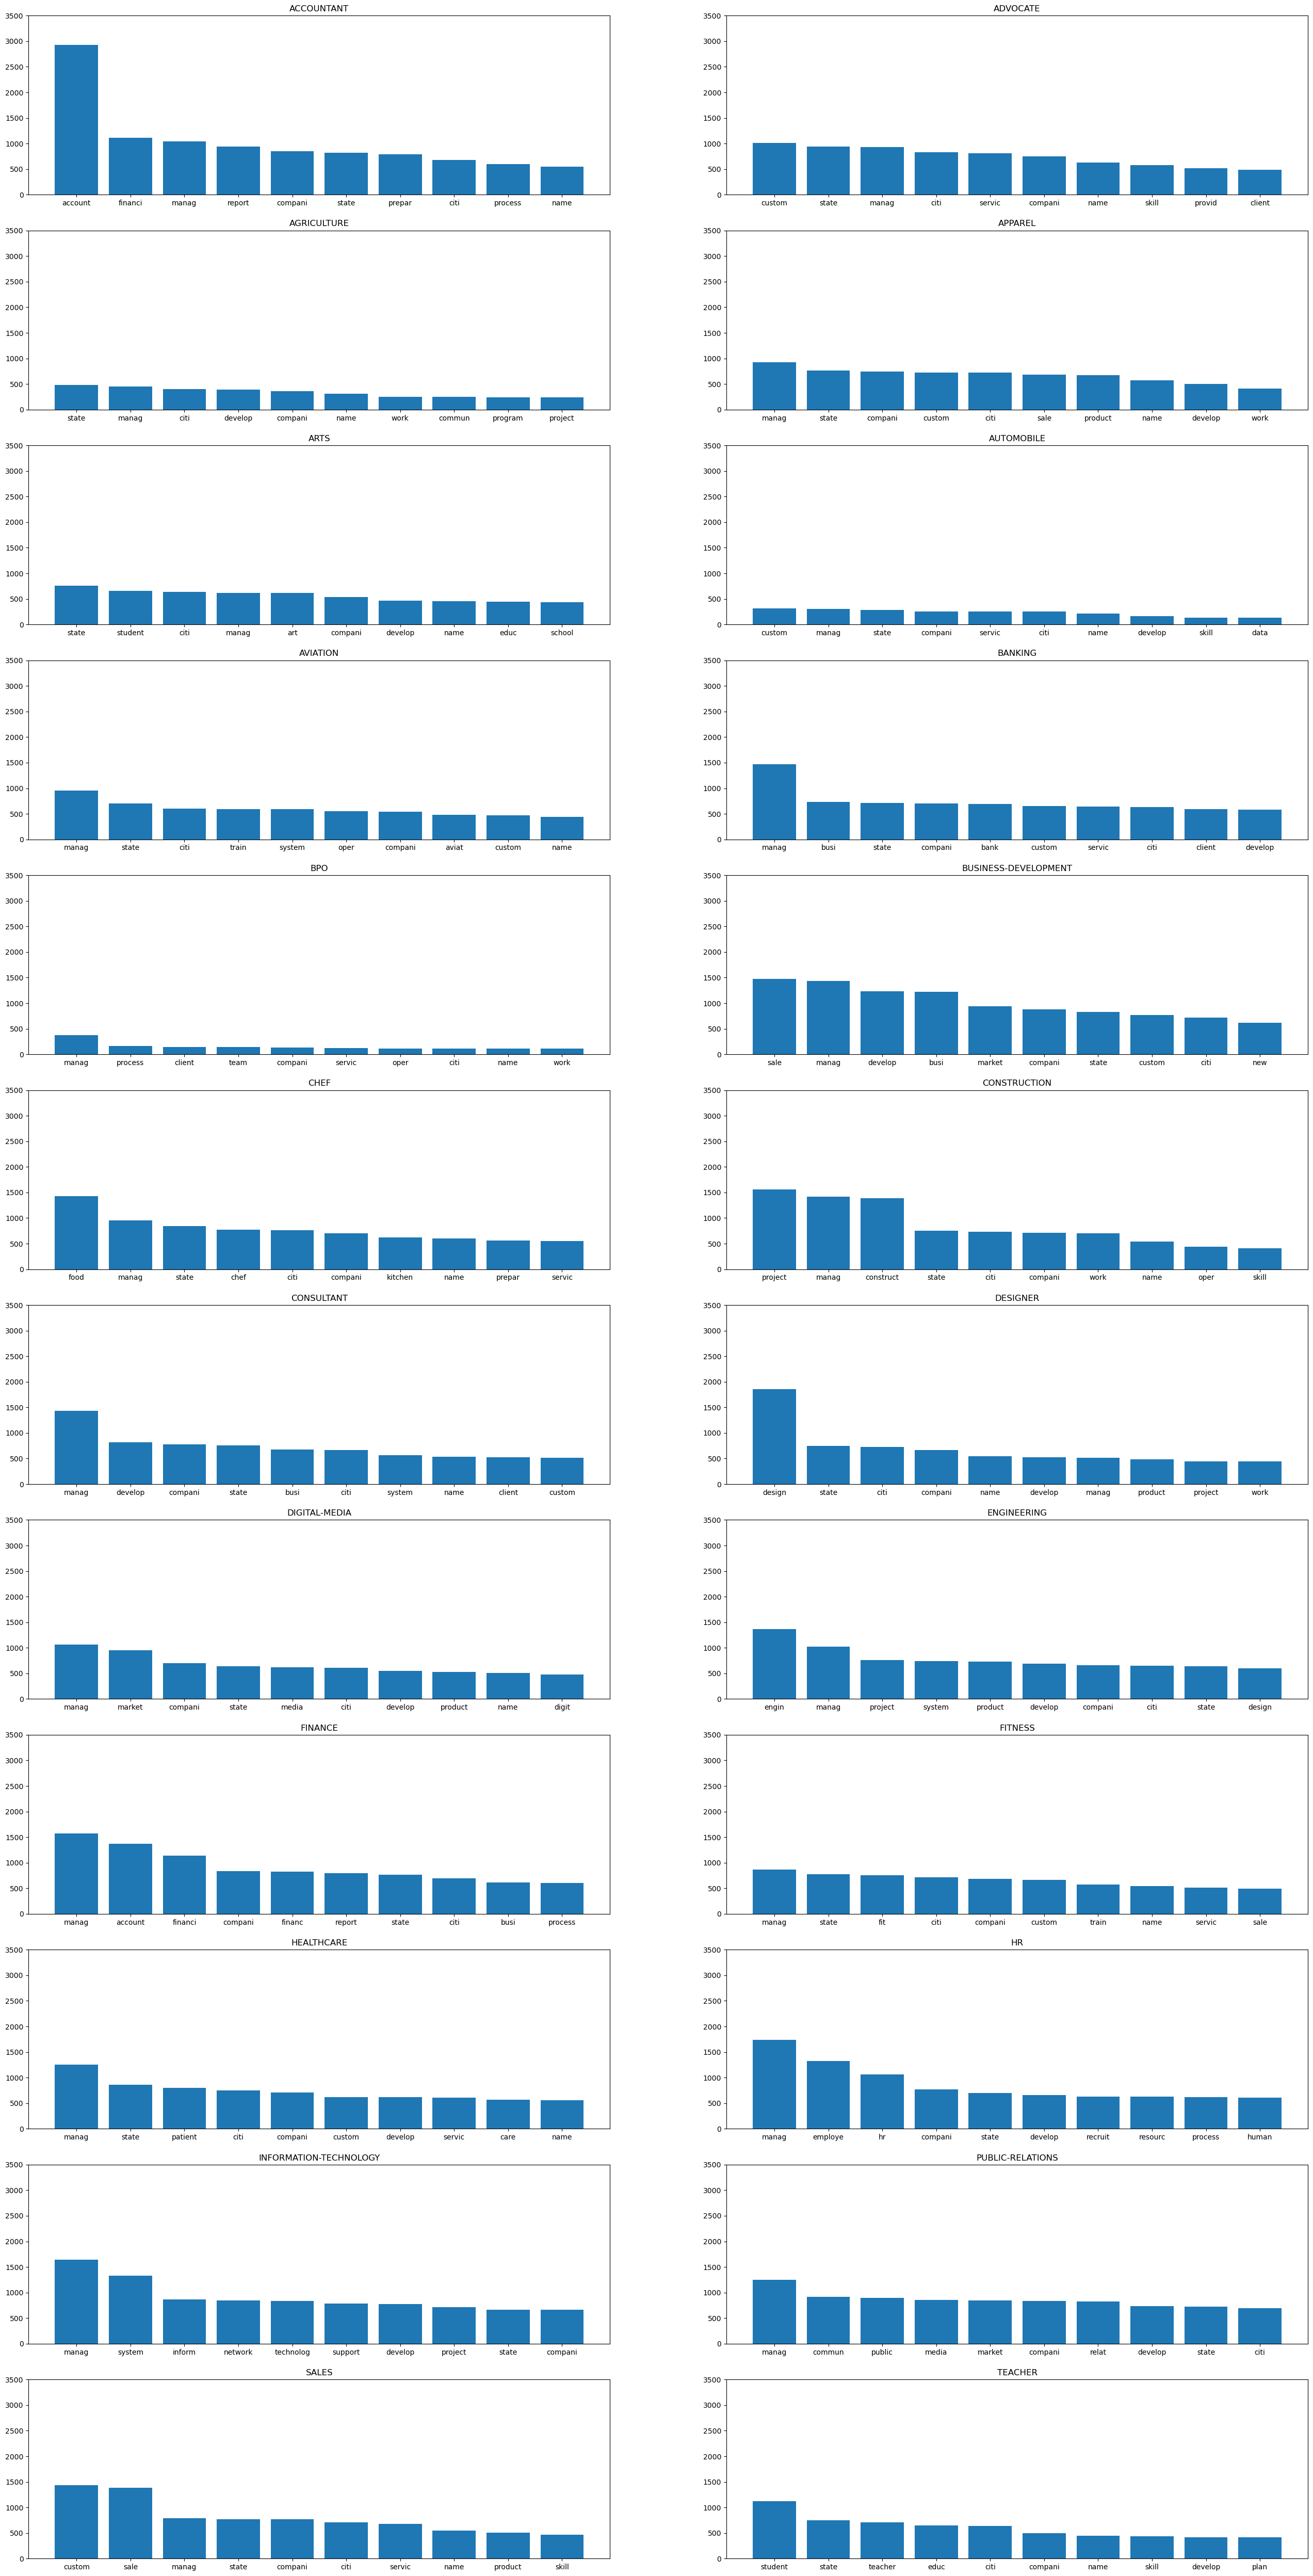

In [17]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(np.sort(df['Category'].unique())):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(12, 2, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [18]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

In [20]:
stop_words = stopwords.words('english')

In [21]:
#function which stop words and the words less than 2 characters
def remove_stop_words (text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)

  return result

In [22]:
df['clean'] = df['Resume'].apply(remove_stop_words).astype(str)

In [23]:
df['clean'][0]

"['administr', 'market', 'associ', 'administr', 'summari', 'dedic', 'custom', 'servic', 'manag', 'year', 'experi', 'hospit', 'custom', 'servic', 'manag', 'respect', 'builder', 'leader', 'custom', 'focus', 'team', 'strive', 'instil', 'share', 'enthusiast', 'commit', 'custom', 'servic', 'highlight', 'focus', 'custom', 'satisfact', 'team', 'manag', 'market', 'savvi', 'conflict', 'resolut', 'techniqu', 'train', 'develop', 'skill', 'multi', 'tasker', 'client', 'relat', 'specialist', 'accomplish', 'missouri', 'supervisor', 'train', 'certif', 'certifi', 'custom', 'loyalti', 'market', 'segment', 'hilton', 'worldwid', 'gener', 'manag', 'train', 'certif', 'accomplish', 'trainer', 'cross', 'server', 'hospit', 'hilton', 'micro', 'opera', 'fidelio', 'opera', 'reserv', 'holidex', 'complet', 'cours', 'seminar', 'custom', 'servic', 'sale', 'strategi', 'inventori', 'control', 'loss', 'prevent', 'safeti', 'time', 'manag', 'leadership', 'perform', 'assess', 'experi', 'administr', 'market', 'associ', 'adm

In [24]:
df

,Category,Resume,clean
0,HR,hr administr market associ hr administr summar...,"['administr', 'market', 'associ', 'administr',..."
1,HR,hr specialist us hr oper summari versatil medi...,"['specialist', 'oper', 'summari', 'versatil', ..."
2,HR,hr director summari year experi recruit plu ye...,"['director', 'summari', 'year', 'experi', 'rec..."
3,HR,hr specialist summari dedic driven dynam year ...,"['specialist', 'summari', 'dedic', 'driven', '..."
4,HR,hr manag skill highlight hr skill hr depart st...,"['manag', 'skill', 'highlight', 'skill', 'depa..."
...,...,...,...
2479,AVIATION,rank sgt e non commiss offic charg brigad mail...,"['rank', 'commiss', 'offic', 'charg', 'brigad'..."
2480,AVIATION,govern relat commun organiz develop director p...,"['govern', 'relat', 'commun', 'organiz', 'deve..."
2481,AVIATION,geek squad agent profession profil support spe...,"['geek', 'squad', 'agent', 'profession', 'prof..."
2482,AVIATION,program director offic manag summari highli pe...,"['program', 'director', 'offic', 'manag', 'sum..."


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['clean'], df['Category'], test_size = 0.2)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# vectorize text data
vectorizer = CountVectorizer()
conuntvectorizer_train = vectorizer.fit_transform(X_train).astype(float)
conuntvectorizer_test = vectorizer.transform(X_test).astype(float)

In [28]:
# using grid search for find optimal values for RF classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5, scoring='accuracy', return_train_score=False, verbose=1)
grid_search = grid.fit(conuntvectorizer_train, Y_train)

print(grid_search.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [29]:
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
RF_Model.fit(conuntvectorizer_train, Y_train)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42)

In [30]:
prediction=RF_Model.predict(conuntvectorizer_test)
prediction

array(['ACCOUNTANT', 'ENGINEERING', 'APPAREL', 'TEACHER', 'HEALTHCARE',
       'TEACHER', 'ACCOUNTANT', 'ACCOUNTANT', 'ENGINEERING', 'TEACHER',
       'TEACHER', 'SALES', 'SALES', 'ENGINEERING', 'DESIGNER',
       'BUSINESS-DEVELOPMENT', 'DESIGNER', 'HEALTHCARE', 'CHEF', 'HR',
       'SALES', 'BANKING', 'CHEF', 'SALES', 'ENGINEERING', 'HR',
       'INFORMATION-TECHNOLOGY', 'ADVOCATE', 'HEALTHCARE',
       'DIGITAL-MEDIA', 'AVIATION', 'ACCOUNTANT', 'AVIATION', 'FINANCE',
       'HR', 'HEALTHCARE', 'SALES', 'HEALTHCARE',
       'INFORMATION-TECHNOLOGY', 'FINANCE', 'SALES', 'ACCOUNTANT',
       'CONSTRUCTION', 'AVIATION', 'BUSINESS-DEVELOPMENT', 'HEALTHCARE',
       'HEALTHCARE', 'AVIATION', 'HR', 'FINANCE',
       'INFORMATION-TECHNOLOGY', 'BANKING', 'BUSINESS-DEVELOPMENT',
       'INFORMATION-TECHNOLOGY', 'ACCOUNTANT', 'ACCOUNTANT',
       'INFORMATION-TECHNOLOGY', 'INFORMATION-TECHNOLOGY', 'CONSTRUCTION',
       'ENGINEERING', 'SALES', 'ENGINEERING', 'DESIGNER', 'ENGINEERING',
       '

In [31]:
print("training Score: {:.2f}".format(RF_Model.score(conuntvectorizer_train, Y_train)))
print("test Score: {:.2f}".format(RF_Model.score(conuntvectorizer_test, Y_test)))

training Score: 0.86
test Score: 0.60


In [32]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (RF_Model, metrics.classification_report(Y_test, prediction)))

model report: RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42): 
                         precision    recall  f1-score   support

            ACCOUNTANT       0.58      0.88      0.70        25
              ADVOCATE       0.94      0.54      0.68        28
           AGRICULTURE       1.00      0.22      0.36         9
               APPAREL       1.00      0.29      0.45        24
                  ARTS       0.50      0.07      0.12        15
            AUTOMOBILE       0.00      0.00      0.00         8
              AVIATION       0.81      0.86      0.83        29
               BANKING       0.76      0.64      0.70        25
                   BPO       0.00      0.00      0.00         3
  BUSINESS-DEVELOPMENT       0.37      0.67      0.47        21
                  CHEF       0.68      0.94      0.79        18
          CONSTRUCTION       0.77      0.74      0.75        27
            CONSULTANT       0.00  

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


NameError: name 'cleanResume' is not defined